In [7]:
%matplotlib inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def plotFluxes(ax, time, fluxes, colors):
    flux_names = list(fluxes.keys())
    flux_names.sort()
    for flux_name in flux_names:
        ax.plot(time, fluxes[flux_name], label=flux_name, c=colors[flux_name])
    ax.set_title('Fluxes')
    ax.set_xlabel('Days')
    ax.set_ylabel('Wm$^{-2}$')
    ax.legend()
    ax.grid()

In [39]:
def plotFluxesSeries(job_name, test_dir = ''):
    base_name = '/Users/haynesstephens1/uchi/research/climproj/climt_files/'
    file_name = '{0}{1}{2}/{2}'.format(base_name, test_dir, job_name)
    plot_base = '/Users/haynesstephens1/uchi/research/climproj/climproj/figures/'
    plot_dir = '{0}{1}{2}{3}'.format(plot_base, 'FluxSeries/', test_dir, job_name)
    os.system('mkdir -p {0}'.format(plot_dir))
    plot_name = '{0}/{1}_fluxes.png'.format(plot_dir, job_name)
    print(plot_name)
    
    def loadData(file_name, var):
        return np.loadtxt('{0}_{1}.csv'.format(file_name, var), delimiter = ',')

    time = loadData(file_name, 'time') / (60 * 60 * 24)
    lh = loadData(file_name, 'surface_upward_latent_heat_flux')
    sh = loadData(file_name, 'surface_upward_sensible_heat_flux')
    
    upwelling_longwave_flux_in_air = loadData(file_name, 'upwelling_longwave_flux_in_air')
    upwelling_shortwave_flux_in_air = loadData(file_name, 'upwelling_shortwave_flux_in_air')
    downwelling_longwave_flux_in_air = loadData(file_name, 'downwelling_longwave_flux_in_air')
    downwelling_shortwave_flux_in_air = loadData(file_name, 'downwelling_shortwave_flux_in_air')

    net_flux = (upwelling_longwave_flux_in_air +
                upwelling_shortwave_flux_in_air -
                downwelling_longwave_flux_in_air -
                downwelling_shortwave_flux_in_air)

    net_rad_surf = net_flux[:, 0]
    net_rad_toa = net_flux[:,-1]
    net_surf = net_rad_surf + lh + sh
    
    lw_net = upwelling_longwave_flux_in_air - downwelling_longwave_flux_in_air
    lw_surf = lw_net[:, 0]
    lw_toa = lw_net[:, -1]
    
    sw_net = upwelling_shortwave_flux_in_air - downwelling_shortwave_flux_in_air
    sw_surf = sw_net[:, 0]
    sw_toa = sw_net[:, -1]

    fig, ax = plt.subplots(1,1, figsize=(10,10)) 
    fluxes = {'SH':sh, 'LH':lh, 'LWsurf':lw_surf, 'NETsurf':net_surf,'NETtoa':net_rad_toa}
    colors = {'SH':'orange', 'LH':'blue', 'LWsurf':'red', 'NETsurf':'black','NETtoa':'cyan'}
    
    plotFluxes(ax, time, fluxes, colors)
    plt.tight_layout()
#     plt.savefig(plot_name)

/Users/haynesstephens1/uchi/research/climproj/climproj/figures/FluxSeries/varying_co2_cst_q_rad/fixed_stepper/i2_320solar_cst_q_rad_fixed_stepper/i2_320solar_cst_q_rad_fixed_stepper_fluxes.png


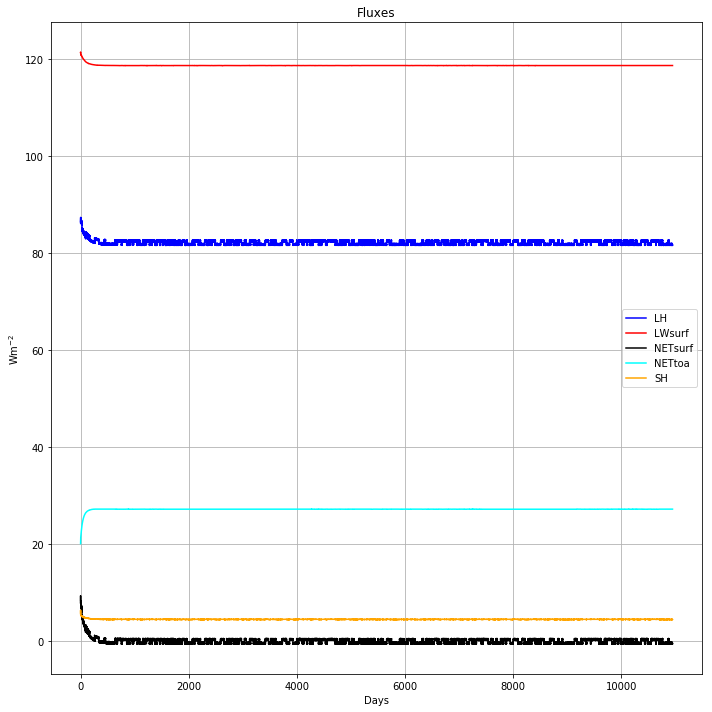

In [72]:
plotFluxesSeries('i2_320solar_cst_q_rad_fixed_stepper', test_dir='varying_co2_cst_q_rad/fixed_stepper/')

In [65]:
def plotQandT(axes, time, q_surf, q_tot, t_surf):
    ax0 = axes[0]
    ax0.set_title('Q and T')
    ax0.plot(time, q_surf, label='Qsurf', c='blue')
    ax0.set_ylabel('kg/kg')
    ax0.grid()

    ax1 = axes[1]
    ax1.plot(time, q_tot, label='Qtot', c='cyan')
    ax1.set_ylabel('kg/kg')
    ax1.grid()

    ax2 = axes[2]
    ax2.plot(time, t_surf, '--', label='Tsurf', c='black')
    ax2.set_xlabel('Days')
    ax2.set_ylabel('K')
    ax2.grid()

In [66]:
def plotQandTSeries(job_name, test_dir = ''):
    base_name = '/Users/haynesstephens1/uchi/research/climproj/climt_files/'
    file_name = '{0}{1}{2}/{2}'.format(base_name, test_dir, job_name)
    plot_base = '/Users/haynesstephens1/uchi/research/climproj/climproj/figures/'
    plot_dir = '{0}{1}{2}{3}'.format(plot_base, 'FluxSeries/', test_dir, job_name)
    os.system('mkdir -p {0}'.format(plot_dir))
    plot_name = '{0}/{1}_fluxes.png'.format(plot_dir, job_name)
    print(plot_name)
    
    def loadData(file_name, var):
        return np.loadtxt('{0}_{1}.csv'.format(file_name, var), delimiter = ',')

    time = loadData(file_name, 'time') / (60 * 60 * 24)
    q = loadData(file_name, 'specific_humidity')
    q_surf = q.copy()[:,0]
    q_tot = np.sum(q.copy(), axis=1)
    t_surf = loadData(file_name, 'surface_temperature')
    
    fig, axes = plt.subplots(3,1, figsize=(10,10)) 
    plotQandT(axes, time, q_surf, q_tot, t_surf)
    plt.tight_layout()
#     plt.savefig(plot_name)

/Users/haynesstephens1/uchi/research/climproj/climproj/figures/FluxSeries/varying_co2_cst_q_rad/fixed_stepper/i2_320solar_cst_q_rad_fixed_stepper/i2_320solar_cst_q_rad_fixed_stepper_fluxes.png


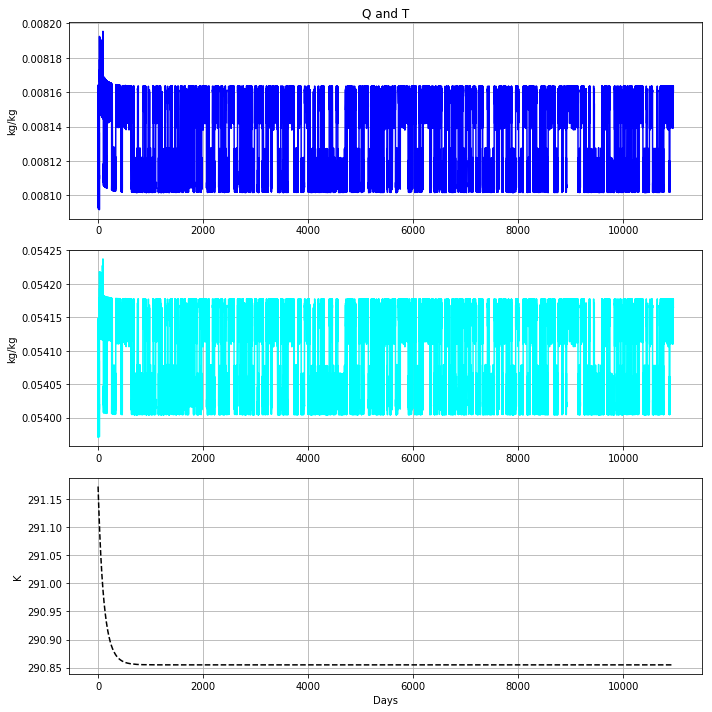

In [71]:
plotQandTSeries('i2_320solar_cst_q_rad_fixed_stepper', test_dir='varying_co2_cst_q_rad/fixed_stepper/')